(intro-seaborn-notebook)=
# Introduzione a Seaborn

Nel capitolo precedente abbiamo introdotto Matplotlib. La libreria Seaborn è un complemento di Matplotlib e consente di generare in maniera molto semplice varie visualizzazioni dei dati utili per la data science. Per un approfondimento, rimando ai tutorial sulla pagina web di [Seaborn](https://seaborn.pydata.org/). Presento qui alcuni esempi.

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.constants import golden
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [2]:
%matplotlib inline
sns.set_theme(
    context="paper",
    style="darkgrid",
    palette="colorblind",
    rc={"figure.figsize": (5.0, 5.0 / golden)},
)

SEED = 12345
rng = np.random.default_rng(SEED)

Considero nuovamente i dati Palmer penguin.

In [3]:
df = pd.read_csv("data/penguins.csv")

## Visualizzare la distribuzione dei dati

Una delle rappresentazioni grafiche dei dati che si usano più spesso è l'istogramma, o l'istogramma lisciato. Come in precedenza, possiamo creare un istogramma o un kde plot direttamente da pandas:

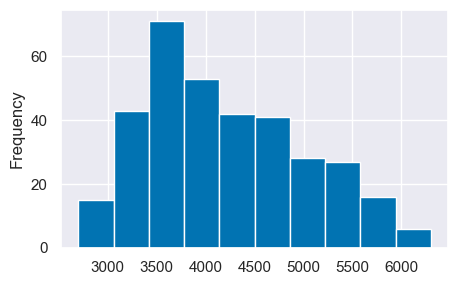

In [4]:
df["body_mass_g"].plot.hist()

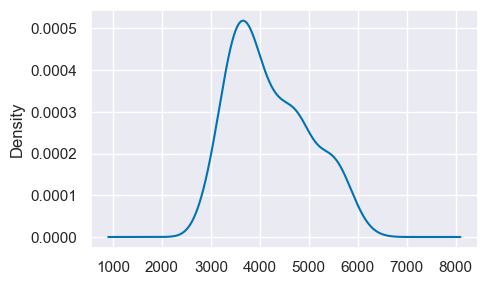

In [5]:
df["body_mass_g"].plot.kde(bw_method=0.3)

Oppure possiamo usare Seaborn:

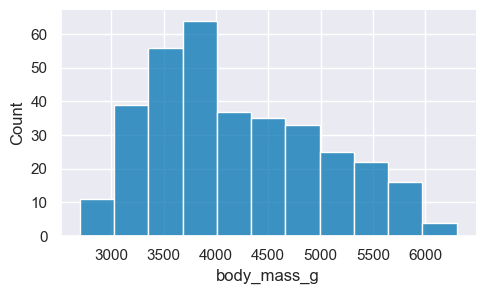

In [6]:
_ = sns.displot(df, x="body_mass_g", aspect=1.618, height=3.1)

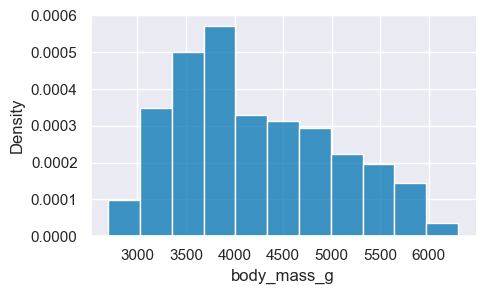

In [7]:
_ = sns.displot(df, x="body_mass_g", stat="density", aspect=1.618, height=3.1)

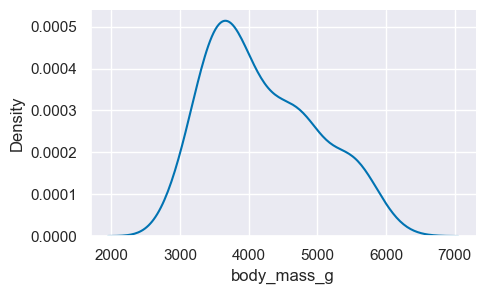

In [8]:
_ = sns.displot(df, x="body_mass_g", kind="kde", aspect=1.618, height=3.1)

Creaiamo l'istogramma lisciato di `body_massg` in funzione di `species`:

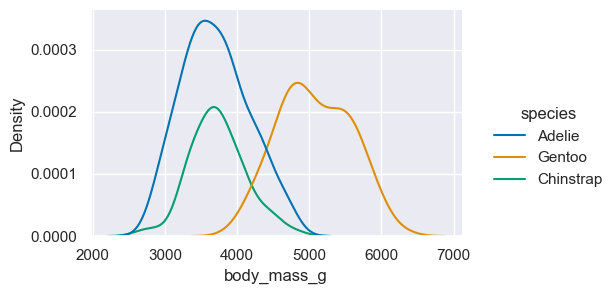

In [9]:
_ = sns.displot(
    df, x="body_mass_g", hue="species", kind="kde", aspect=1.618, height=3.1
)

## Visualizzazione di dati categoriali

Consideriamo ora il caso in cui si vuole rappresentare la relazione tra una variabile numerica e una variabile categoriale. 

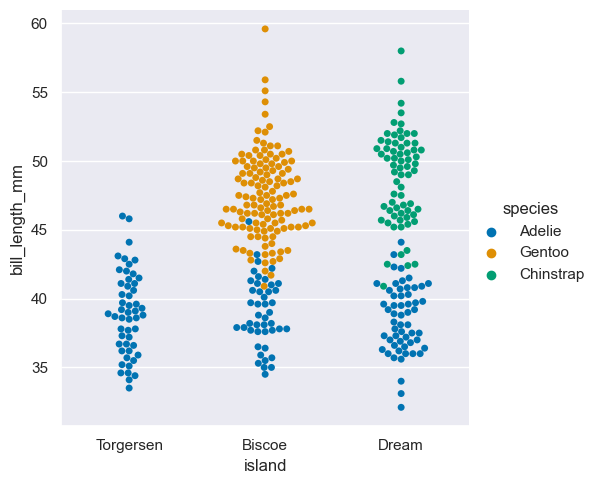

In [21]:
_ = sns.catplot(data=df, x="island", y="bill_length_mm", hue="species", kind="swarm")

Scopriamo che

- Adelie vive in tutte e tre le isole.
- Gentoo vive solo in Biscoe.
- Gentoo e Chinstrap hanno becchi più lunghi rispetto ad Adelie.

Analizziamo ora la massa del corpo in funzione della specie, distinguendo le osservazioni in base al genere. Creaiamo il grafico con dei boxplot.

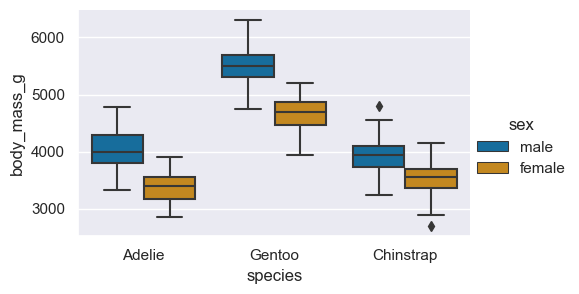

In [18]:
_ = sns.catplot(
    df, x="species", y="body_mass_g", hue="sex", kind="box", aspect=1.618, height=3.1
)

Dal diagramma è evidente che i pinguini maschi pesano più delle femmine in tutte le specie e che i pinguini Gentoo pesano più di quelli Adelie e Chinstrap. 

In alternativa, possiamo usare la rappresentazione del violinplot.

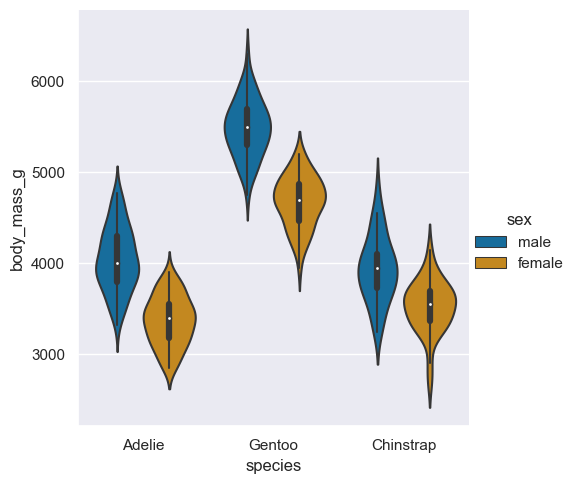

In [15]:
_ = sns.catplot(
    df, x="species", y="body_mass_g", hue="sex", kind="violin", aspect=1.618, height=3.1
)

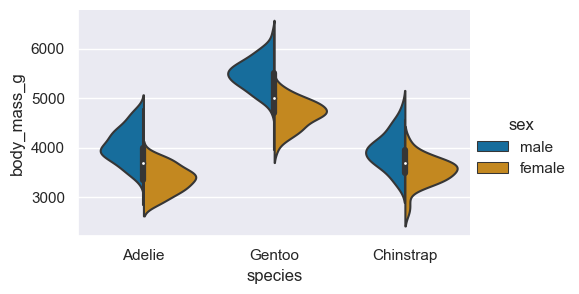

In [23]:
_ = sns.catplot(
    df,
    x="species",
    y="body_mass_g",
    hue="sex",
    kind="violin",
    split=True,
    aspect=1.618,
    height=3.1,
)

## Relazioni tra variabili

Calcoliamo la correlazione tra le variabili.

In [31]:
vars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
corr_matrix = df[vars].corr().round(2)
corr_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.00,-0.24,0.66,0.60
bill_depth_mm,-0.24,1.00,-0.58,-0.47
flipper_length_mm,0.66,-0.58,1.00,0.87
body_mass_g,0.60,-0.47,0.87,1.00


È più semplice leggere queste informazioni usando la rappresentazione seguente.

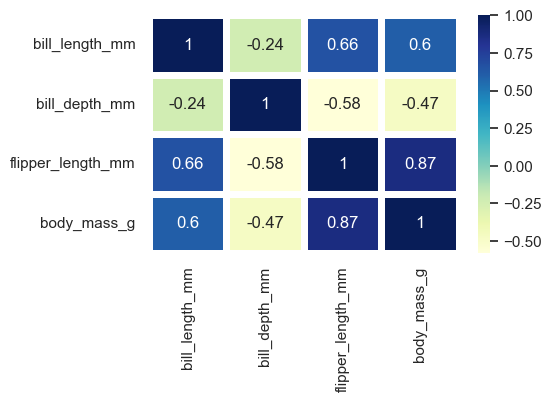

In [33]:
sns.heatmap(corr_matrix, annot=True, linecolor="white", linewidths=5, cmap="YlGnBu")

La lunghezza della pinna e la massa corporea sono fortemente associati con una correlazione di 0.87. In altre parole, i pinguini con pinne più lunghe generalmente pesano di più.

Vediamo qui sotto un esempio di diagramma a dispersione.

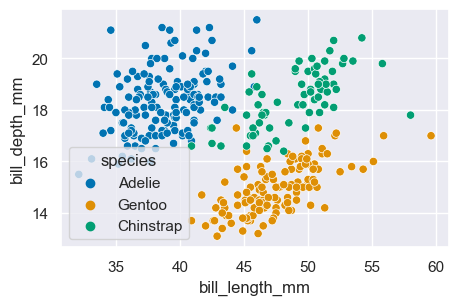

In [34]:
_ = sns.scatterplot(df, x="bill_length_mm", y="bill_depth_mm", hue="species")

Chiaramente le osservazioni delle tre specie si raggruppano in cluster separati. Per ciascuna specie, la lunghezza e la largezza del becco rientrano in un certo intervallo.

È utile creare grafici separati in base a qualche dimensione dei dati; nell'esempio qui sotto, in base all'isola:

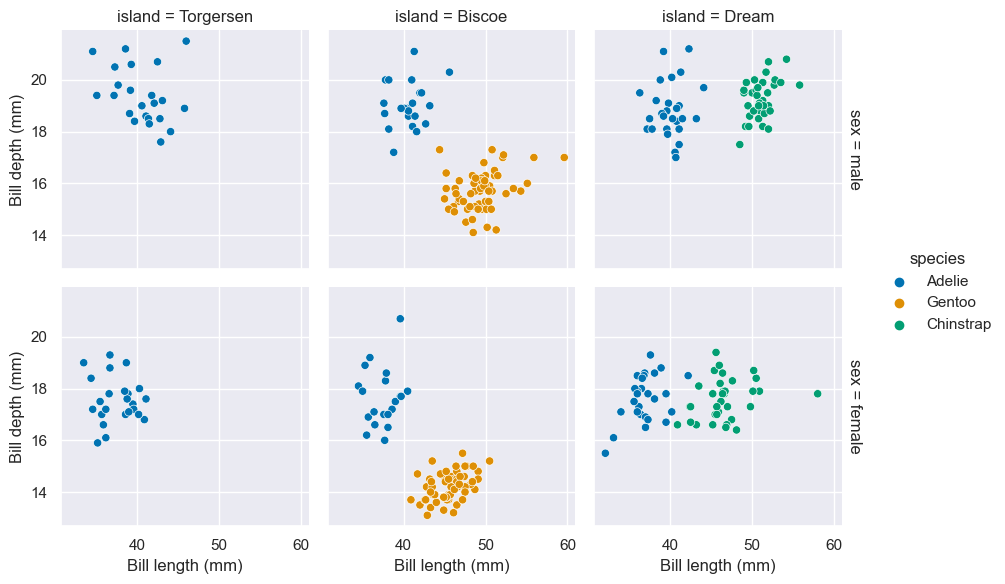

In [35]:
g = sns.relplot(
    data=df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    row="sex",
    col="island",
    height=3,
    facet_kws=dict(margin_titles=True),
)
g.set_axis_labels(
    "Bill length (mm)",
    "Bill depth (mm)",
)

## Watermark

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv -w